# Exercise 2 - Image Classification with ML and DL

In this exercise you and your team have to finish the implementation of the following machine learning code.  

This exercise consists of the following steps which have to work in conjunction:
* Data visualization - Visualize the data to become familiar with it and identify possible patterns and problems
* Data preparation - Prepare the data for it to be usable later in the machine learning model
* Model creation - Chose/build a machine learning model suitable for the given task
* Model training - Train your model with the data you prepared
* Model evaluation - Evaluate the performance of your model. For this choose appropriate measurement metrics and visualize it with the help of graphs and figures

---

**You will find tasks all throughout this notebook. The start and the end of a task is marked through parting lines as in between these lines you can add as many code cells as you need to finish the task and to add your documentation.**

In [1]:
#Team consists of:
#Navdeep Singh, Hugo Hernan Vergara Vasquez, Anastasiya Urusova, Florian Panek

---

## Part 1 - Classical Machine Learning Algorithms

### Important imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import pathlib

### Inspect the data 

The first step of every machine learning project is to make oneself familiar with the data.  

* In what form is the data accessible?
* How many samples are there?
* Are they already sorted by class?
* etc.

It is important to look through them programmatically and manually to see if maybe some prior preparation is needed before even loading the data.

You can use the following code to check, if your dataset is in the right place (data/CIFAR-10-images/)

In [3]:
# Get information about the folder contents
for dirpath, dirnames, filenames in os.walk("data/CIFAR-10-images/"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'data/CIFAR-10-images/'.
There are 10 directories and 0 images in 'data/CIFAR-10-images/test'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test\airplane'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test\automobile'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test\bird'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test\cat'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test\deer'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test\dog'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test\frog'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test\horse'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test\ship'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test\truck'.
There are 10 directories and 0 images in 'data/CIFAR-10-images/train'.
There are 0 di

**Since each sample is already sorted into its own dictionary we don't have to do it ourselves and can take the folder names as names for our classes we want our model to be able to classify**

---

#### Task 01 - Generate Class Names

##### Use the Numpy *np.array()* to create a list of class names from the subdirectories!

Take a look here if you're stuck: https://numpy.org/doc/stable/

The output should look something like this:

`['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck'] 10`


In [4]:
# get class names from folders
data_dir = pathlib.Path("data/CIFAR-10-images/train/")  # turn our training path into a Python path

#class_names =  # TODO: create a list of class_names from the subdirectories
class_names = np.array([f for f in os.listdir(data_dir) if not f.startswith('.')])

print(class_names, len(class_names))

['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck'] 10


#### Next, you need to associate class names with numbers.

The output should look something like this:
`(10,
 {'airplane': 0,
  'automobile': 1,
  'bird': 2,
  'cat': 3,
  'deer': 4,
  'dog': 5,
  'frog': 6,
  'horse': 7,
  'ship': 8,
  'truck': 9})`

In [5]:
# associate class names with numbers, machinelaerning and deeplearning works with numbers!
#class_names_dict =  # TODO: create the dictionary
class_names_dict = dict(enumerate(class_names.flatten(), 0))
len(class_names_dict), class_names_dict



(10,
 {0: 'airplane',
  1: 'automobile',
  2: 'bird',
  3: 'cat',
  4: 'deer',
  5: 'dog',
  6: 'frog',
  7: 'horse',
  8: 'ship',
  9: 'truck'})

---

### Visualizing

After getting a feeling about the size and structure of our data on our hard drive, the next step is to visualize the data.  
In the case of image data this can be done by loading random images and plotting them. Also, just looking through them in their folders is a good idea.

In [6]:
import random
import matplotlib.image as mpimg


def display_random_img(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])

    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape: {img.shape}")

    return img

**By running the code cell below we can look through random images and might be able to see out-liners or maybe even wrongly labeled images**

---

#### Task 02 - Displaying an image

##### Use the *display_random_img(target_dir, target_class)* function to display a random image with the corresponding label.

If done right, you should see the image below your function call.

Image shape: (32, 32, 3)


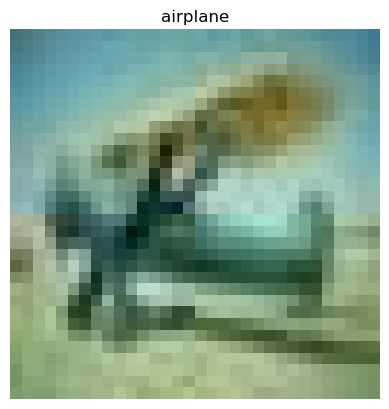

In [7]:
# Display a random image
testpath = 'data/CIFAR-10-images/test/'
trainingpath = 'data/CIFAR-10-images/test/'

img =  display_random_img(testpath, 'airplane')# TODO: Call display_random_img(target_dir, target_class) right here

Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)


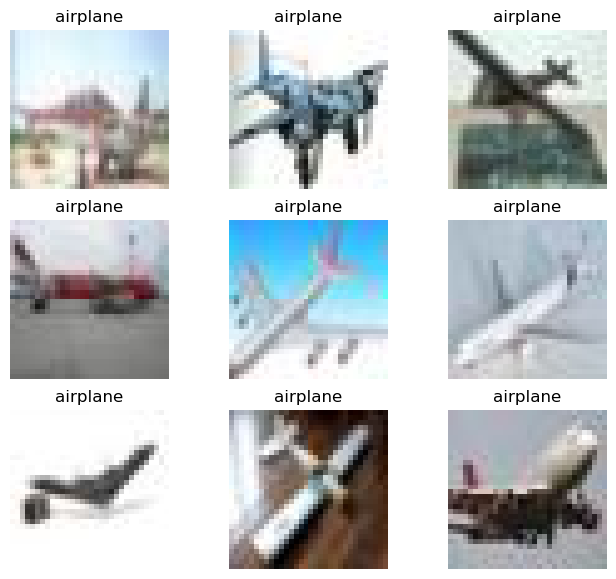

In [8]:
# Display multiple images from the data set
plt.figure(figsize=(8, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    #img =  # TODO: Call display_random_img(target_dir, target_class) right here (Care: pass the right target class!)
    img = display_random_img(testpath, 'airplane')
    plt.axis(False)

**An images representation is nothing else than a array of the pixel values. These values are usually between 0 and 255 and depending on the value the pixel is brighter or darker. By overlaying the 3 color channels red, green, blue (RGB) the colored images we know are created**

Image shape: (32, 32, 3)
[[[174 172 185]
  [174 174 186]
  [174 178 189]
  ...
  [154 166 178]
  [170 182 194]
  [149 163 174]]

 [[174 172 185]
  [174 174 186]
  [174 178 189]
  ...
  [161 171 181]
  [138 151 160]
  [155 167 179]]

 [[173 173 185]
  [173 175 187]
  [174 178 189]
  ...
  [176 185 194]
  [161 170 179]
  [163 172 181]]

 ...

 [[159 172 178]
  [157 168 174]
  [165 176 180]
  ...
  [157 162 165]
  [150 155 158]
  [146 151 154]]

 [[162 175 183]
  [155 168 174]
  [160 171 177]
  ...
  [162 170 172]
  [159 167 169]
  [152 162 163]]

 [[152 167 174]
  [155 168 174]
  [164 177 183]
  ...
  [152 162 163]
  [148 158 159]
  [141 151 152]]]


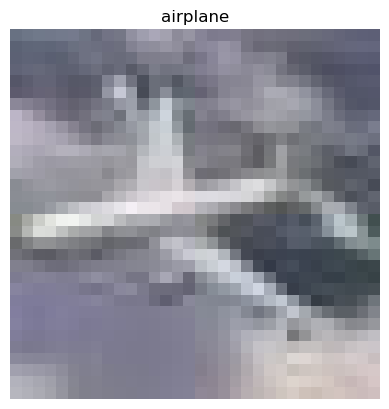

In [9]:
#https://www.geeksforgeeks.org/how-to-convert-images-to-numpy-array/
# TODO: Display image as array
image = display_random_img(testpath, 'airplane')
numpyArrayImage = np.array(img)
print(numpyArrayImage)

**The image shape is (32, 32, 3) this means the width and the height of the image consists of 32 pixels and 3 color channels**

In [340]:
# TODO: Display image shape (Remember, the image datatype should be a Numpy Array -> https://numpy.org/doc/stable/reference/generated/numpy.shape.html)
print(numpyArrayImage.shape)

(32, 32, 3)


---

### Generate dataset out of CIFAR-10 images

Now that we got familiar with our data it is time to create a data set with which we can train our machine learning algorithm.
Since the folder structure is split into train and test we will also only generate a training and test set.

#### Loading data from the file system and generating training and test sets

To load the images from the file system we need to walk through the folders and add the images (normalized) to an array as well as the corresponding labels. Also, for the machine learning algorithms to work with these arrays we need to convert them to numpy arrays

---

#### Task 03 - Load images as features and labels  

##### Finish the function to load the images and their corresponding labels and return them as numpy arrays
* loop through the directory with os.walk https://www.geeksforgeeks.org/os-walk-python/
* create a filepath for each file
* and load each file with mpimg.imread https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html
* normalize each image https://medium.com/analytics-vidhya/a-tip-a-day-python-tip-8-why-should-we-normalize-image-pixel-values-or-divide-by-255-4608ac5cd26a
* do not forget the labels
* return them as a numpy array

In [341]:

def load_images_as_features_and_labels(target_dir, class_name_dictionary):
    """
    returns 
    X -- images as numpy array
    y -- labels as numpy array
    """
    # TODO: Add your code here
    
    X = [] #images
    y = [] #labels
    
    for i in range (0, len(class_name_dictionary)):
        for file in os.listdir(target_dir + class_name_dictionary[i]):
            #data_dir = pathlib.Path("data/CIFAR-10-images/train/")
            filepath = pathlib.Path(target_dir + class_name_dictionary[i] + "/" + file)
            #print(filepath)
            picture = mpimg.imread(filepath) #read picture
            picture = picture / 255#normalize picture
            X.append(picture)
            y.append(class_name_dictionary[i])


    #convert to numpy array
    X = np.asarray(X)
    y = np.asarray(y)
    return X, y 
  
#load_images_as_features_and_labels('data/CIFAR-10-images/train/', class_names_dict)



With help of the function above we can now load the images and there labels as a training and test set (this could take a while, depending on your hardware!)

In [342]:
X_train, y_train = load_images_as_features_and_labels('data/CIFAR-10-images/train/', class_names_dict)
X_test, y_test = load_images_as_features_and_labels('data/CIFAR-10-images/test/', class_names_dict)

X_train, y_train, X_test, y_test

(array([[[[0.78431373, 0.79215686, 0.77254902],
          [0.79215686, 0.8       , 0.78039216],
          [0.79607843, 0.80392157, 0.78431373],
          ...,
          [0.80392157, 0.80784314, 0.78823529],
          [0.79215686, 0.79607843, 0.77647059],
          [0.78823529, 0.79215686, 0.77254902]],
 
         [[0.82352941, 0.83137255, 0.81176471],
          [0.81176471, 0.81960784, 0.8       ],
          [0.81568627, 0.82352941, 0.80392157],
          ...,
          [0.81960784, 0.82352941, 0.80392157],
          [0.81176471, 0.81568627, 0.79607843],
          [0.80784314, 0.81176471, 0.79215686]],
 
         [[0.83137255, 0.83921569, 0.82745098],
          [0.81568627, 0.82352941, 0.81176471],
          [0.83137255, 0.83921569, 0.82745098],
          ...,
          [0.83529412, 0.83921569, 0.81960784],
          [0.82745098, 0.83137255, 0.81176471],
          [0.82352941, 0.82745098, 0.80784314]],
 
         ...,
 
         [[0.85882353, 0.85882353, 0.86666667],
          [0.83529

### Visualizing once again

After loading our data as training and test set it is once again important to visualize the loaded data. This way our understanding of our data grows, and we might notice errors we would not otherwise

First investigate the shape of our training and test set. One of the most common errors in ML is that the input shape for the algorithm is not compatible with the shape of our data

TODO: Print the shape of each data set. It should look like this `((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))`

In [343]:
# TODO: Add your code here
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


---

These shapes tell us the following:
* X_train is a four dimensional array
    - The first dimension tells us how many samples are in the array - 50000
    - The second dimension tells us how many pixel values the image has to represent its height - 32
    - The third dimension tells us how many pixel values the image has to represent its width - 32
    - The fourth dimension tells us how many color channels the image has (red ,green blue - RGB) - 3
* y_train is a one dimensional array containing the corresponding labels to X_train

Next we will visualize the actual images contained in our loaded data

In [344]:
def print_multiple_figures(images_array):
    plt.figure(figsize=(9, 9))
    for idx, img in enumerate(images_array[:100]):
        plt.subplot(10, 10, idx + 1)
        plt.imshow(img, cmap="binary")
        plt.axis("off")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

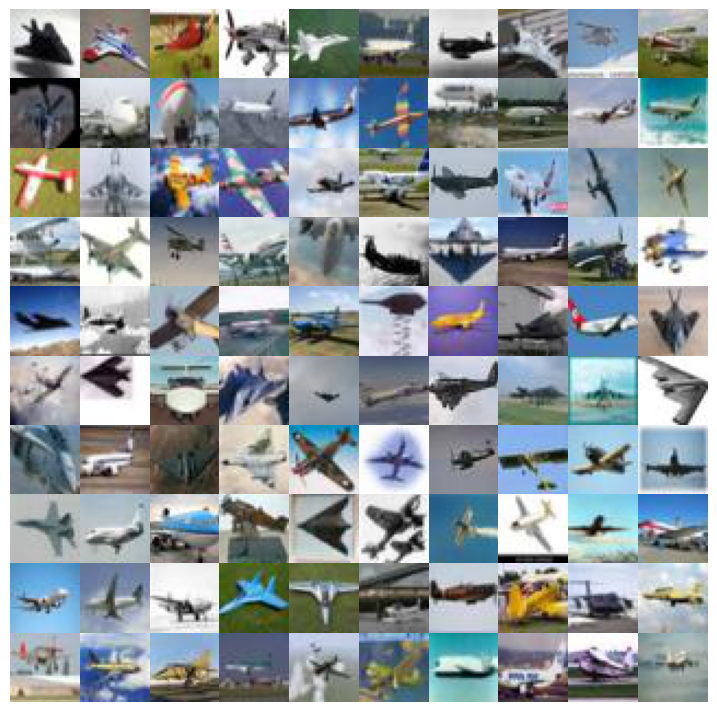

In [345]:
print_multiple_figures(X_train)

**By visualizing the train data we can see that the training set contains the images as we have loaded it. Meaning the data is sorted in order of the walked through folders**

## Training of our machine learning algorithm

We will use the random forest classifier algorithm to try and classify our test images.
For this we first need to once again prepare our data for the algorithm and then fit (train) it on our training data.

**Random forest classifier needs input in shape of (batch, flattened image) i.e (50000, 3072) -> 32*32*3  = 3072. This means we have to reshape or data**

---

#### TASK 04 - Reshaping your data set to make it compatible with the ML algorithm
##### Use numpys shape and reshape functions to reshape the data https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

It should look like this `((50000, 3072), (10000, 3072))`

In [346]:
# Random forest classifier needs input in shape of (batch, flattended image) i.e (50000, 3072) -> 32*32*3  = 3072
# ADD your code here


#X_train_flattened = X_train.flatten() //see also later result..: One shape dimension can be -1. (from numpy docu)
#X_test_flattened = X_test.flatten()
X_train_flattened = np.reshape(X_train, (-1, 3072))
X_test_flattened = np.reshape(X_test, (-1, 3072))

X_train_flattened.shape, X_test_flattened.shape

((50000, 3072), (10000, 3072))

---

After our data has the right shape we can fit/train a RandomForest Classifier on it

---

#### TASK 05 - load and train a RandomForestClassifier
##### use scikit-learns random forest classifier and use your data set to train it https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [72]:
%%time
from sklearn.ensemble import RandomForestClassifier

#https://stackoverflow.com/questions/45554008/error-in-python-script-expected-2d-array-got-1d-array-instead
#updating image flattening...

#number of forests?
#https://www.researchgate.net/publication/230766603_How_Many_Trees_in_a_Random_Forest

# TODO: train the classifier on the data set
rnf_clf = RandomForestClassifier(n_estimators=256) #TODO: load the classifier
rnf_clf.fit(X_train_flattened, y_train)

CPU times: user 6min 5s, sys: 5.4 s, total: 6min 10s
Wall time: 6min 13s


RandomForestClassifier(n_estimators=256)

With the classifier now trained on the training data we can make predictions with it

In [73]:
##https://www.datacamp.com/tutorial/random-forests-classifier-python
y_pred_clf = rnf_clf.predict(X_test_flattened) # TODO: Use the trained classifier to make predictions 


---

### Evaluation of the classifier

It is always important test our classifier. After all how should we know how well it performs?
To measure its performance multiple metrics can be used. The most important being:
* accuracy
* precision
* recall
* f1  

We can calculate it ourselves or import a function from scikit-learn to do it for us.
Now with our predictions and the test data we can evaluate the classifier

---

#### TASK 06 - Evaluate the classifier
##### Use the scikit learns score functions to evaluate accuracy, precision, recall and the f1 score and print the results

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# TODO: Add your code here
print("Accuracy Score:", accuracy_score(y_test, y_pred_clf)) #Accuracy Score: 0.4741 (using 128 forests..)
print("Precision Score:", precision_score(y_test, y_pred_clf, average=None))
print("Recall Score:", recall_score(y_test, y_pred_clf, average=None))
print("f1 score:", f1_score(y_test, y_pred_clf, average=None))


Accuracy Score: 0.4848
Precision Score: [0.56469408 0.53219697 0.40123457 0.38671875 0.41411043 0.43336831
 0.48338608 0.51170213 0.58713886 0.48320413]
Recall Score: [0.563 0.562 0.325 0.297 0.405 0.413 0.611 0.481 0.63  0.561]
f1 score: [0.56384577 0.54669261 0.35911602 0.33597285 0.40950455 0.42293907
 0.53975265 0.49587629 0.60781476 0.51920407]


---

### Viszalization of the evaluation

Another way to evaluate our classifier is by visualizing its performance.  
One way to do that is to use a confusion matrix.  
This matrix tells us how many samples were classified correctly and how many were falsely classified as a different class.
https://en.wikipedia.org/wiki/Confusion_matrix  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

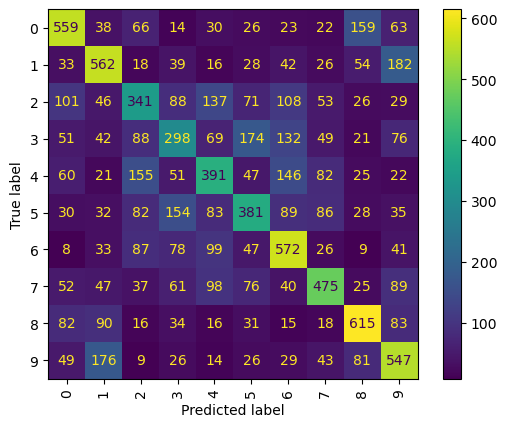

"\nlabels\n{0: 'cat',\n  1: 'dog',\n  2: 'truck',\n  3: 'bird',\n  4: 'airplane',\n  5: 'ship',\n  6: 'frog',\n  7: 'horse',\n  8: 'deer',\n  9: 'automobile'})\n"

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_dict.keys())
disp.plot(xticks_rotation='vertical')
plt.show()

"""
labels
{0: 'cat',
  1: 'dog',
  2: 'truck',
  3: 'bird',
  4: 'airplane',
  5: 'ship',
  6: 'frog',
  7: 'horse',
  8: 'deer',
  9: 'automobile'})
"""

--------------------------------------------------------------

## Part 2 - Convolutional Neural Networks

In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.__version__  # IMPORTANT: This should print '2.8.0', if your version is newer, you might not be able to use your GPU for training!

'2.8.0'

If you have installed tensorflow with gpu support you should first of all be able to output your GPU.  
To install tensorflow with GPU support please follow the steps described here:  
https://www.tensorflow.org/install/pip

In [43]:
# Check if we're using a GPU
!nvidia-smi

Mon Feb 27 00:04:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.24       Driver Version: 528.24       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| 45%   30C    P0    N/A /  75W |   3905MiB /  4096MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Next to make sure tensorflow is able to detect your GPU get the device with `tf.config.list_physical_devices('GPU')`.  
And enable mixed precision if your GPU is good enough.
For more information about mixed precision look here:
https://www.tensorflow.org/guide/mixed_precision

In [44]:
from tensorflow.keras import mixed_precision

gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    details = tf.config.experimental.get_device_details(gpu_devices[0])
    print(f"Your GPUs compute capability is {details['compute_capability'][:]}")
    if details['compute_capability'][0] >= 7.0:
        mixed_precision.set_global_policy('mixed_float16')
        print(f"Your global policy has been set to: {mixed_precision.global_policy()}")
    else:
        print(
            f"Your GPU does not support mixed precision, the global policy is left at: {mixed_precision.global_policy()}")
else:
    print("No GPU device could be found on your machine")
    


Your GPUs compute capability is (6, 1)
Your GPU does not support mixed precision, the global policy is left at: <Policy "float32">


### Load images from directory with image_dataset_from_directory & create augmentation layer

This step describes how data can be loaded and how a CNN model can be trained.  
For more information and examples look here:  
https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory  
https://www.tensorflow.org/api_docs/python/tf/data/Dataset  
https://www.tensorflow.org/tutorials/load_data/images  
https://www.tensorflow.org/tutorials/images/data_augmentation  
https://www.tensorflow.org/guide/keras/preprocessing_layers

---

#### TASK 07 - Load your datasets for training and testing the DL model
##### Use the Tensorflow 'image_dataset_from_directory' method! (use shuffle = True on train_data!)

In [45]:
train_dir = "data/CIFAR-10-images/train/"
test_dir = "data/CIFAR-10-images/test/"

BATCH_SIZE = 64

#train_data =  # TODO load the training set
#test_data =  # TODO load the testing set


#isssue during loading (loaded image default with 256.. https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory)
#https://stackoverflow.com/questions/61742556/valueerror-shapes-none-1-and-none-2-are-incompatible none1/none10
train_data = tf.keras.utils.image_dataset_from_directory(train_dir, batch_size = BATCH_SIZE, image_size=(32,32), label_mode='categorical',  shuffle=True)
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, batch_size = BATCH_SIZE, image_size=(32,32),label_mode='categorical')

Found 50000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


---

In [46]:
# save the amount of classes we have - should be 10
num_classes = len(train_data.class_names)
print(num_classes)
print(len(test_data.class_names))

10
10


### CNN Architecture

* Sequential API - https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
* Functional API - https://www.tensorflow.org/guide/keras/functional
* Subclassing - https://www.tensorflow.org/guide/keras/custom_layers_and_models


To use data augmentation inside our CNN model we first need to create a data augmentation "layer".  
For this we use the Sequential API and stack different preprocessing layers.  
The different layers and their options can be found in the documentation:  
https://www.tensorflow.org/guide/keras/preprocessing_layers

---

#### Task 08 - Build a sequential model with preprocessing layers
##### Use keras sequential API ( https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to stack preprocessing layers. Do not forget to normalize/rescale your data!

In [62]:
# create a sequential model which will be added as a layer in the model
from tensorflow.keras.layers.experimental import preprocessing

#data_augmentation =  #TODO: Build your sequential model here
#using: https://www.tensorflow.org/tutorials/keras/classification
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(scale=1./255),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomRotation(0.3),
    #tf.keras.layers.RandomWidth(0.1),
    tf.keras.layers.RandomContrast(0.1),
    #tf.keras.layers.RandomHeight(0.1)
    tf.keras.layers.RandomFlip(mode='horizontal_and_vertical')
    ]
)




---

Next we build our CNN model, this time with help of the functional API.  
It is the same model as before, but with addition of our `data_augmentation` layer

---

#### Task 09 - Build a model with the functional API 
Use keras functional API (https://www.tensorflow.org/guide/keras/functional) to build your CNN do not forget to include your data_augmentation layer
You can use layers like: 
* Conv2D, 
* Dense,
* BatchNormalization, 
* MaxPooling,
* Dropout,
* Flatten (for input into Dense)
* ....

<p><strong style="color:red">Attention: </strong>Experiment with different 
layers and number of layers until you reach at least 70% accuracy</p>

In [63]:
#https://debuggercafe.com/faster-image-augmentation-in-tensorflow-using-keras-layers/
# build model with functional api

inputs = tf.keras.layers.Input(shape=(32, 32, 3), name='input_layer')

#x =   # TODO: add your augmentation layer/model after the input layer
#TODO: add your layers
x = data_augmentation(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
 
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
 
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
 
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)
 
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)


"""
Loss: 0.7093535661697388
Accuracy: 0.7132999897003174
Recall: 0.8090053200721741
Precision: 0.7595999836921692
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),input_shape=(32, 32, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),input_shape=(32, 32, 3))(x)
x = tf.keras.activations.relu(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3),input_shape=(32, 32, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),input_shape=(32, 32, 3))(x)
x = tf.keras.activations.relu(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3),input_shape=(32, 32, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),input_shape=(32, 32, 3))(x)
x = tf.keras.activations.relu(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3),input_shape=(32, 32, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),input_shape=(32, 32, 3))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.BatchNormalization()(x)
"""

outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)                        

                           
#model = keras.Model()  # TODO: use keras.Model() to build your model
#https://www.tensorflow.org/api_docs/python/tf/keras/Model
model = tf.keras.Model(inputs = inputs, outputs = outputs)  

---

In [64]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 sequential_8 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 batch_normalization_54 (Bat  (None, 32, 32, 3)        12        
 chNormalization)                                                
                                                                 
 conv2d_46 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_55 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 16, 16, 32)       0   

The next steps of compiling, training and evaluating the model are the same as before.  

To train our model we first need to compile it. In this step the most important arguments are the: 
* loss function - https://www.tensorflow.org/api_docs/python/tf/keras/losses
* optimizer - https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

---

#### Task 10 - Compile and train your model
##### use the compile and fit methods respectively to compile and fit/train your model

For compiling use:
* CategoricalCrossentropy as a loss function
* Adam as a optimizer
* and track at least accuracy, Recall, and Precision during training

For fitting use:
* your training data set
* your test data set for validation during training
* Experiment with the number of epochs to avoid overfitting or underfitting your data (https://www.ibm.com/cloud/learn/overfitting)

In [65]:
# TODO: compile your model here
#shapes none,10 and none,1 are incompatible: https://stackoverflow.com/questions/61742556/valueerror-shapes-none-1-and-none-2-are-incompatible?..
model.compile(optimizer="Adam", 
              loss="categorical_crossentropy", 
              metrics=["Recall", 
                       "Precision", 
                       "accuracy"])

In [68]:
#https://www.tensorflow.org/tutorials/images/classification
history =  model.fit(train_data, validation_data=test_data, epochs=1000)# TODO: fit your model here

Epoch 1/1000
782/782 [==============================] - 25s 31ms/step - loss: 1.5041 - recall: 0.2535 - precision: 0.6413 - accuracy: 0.4581 - val_loss: 1.5794 - val_recall: 0.3068 - val_precision: 0.5901 - val_accuracy: 0.4411
Epoch 2/1000
782/782 [==============================] - 24s 30ms/step - loss: 1.4054 - recall: 0.3093 - precision: 0.6697 - accuracy: 0.4961 - val_loss: 1.4537 - val_recall: 0.3290 - val_precision: 0.6194 - val_accuracy: 0.4766
Epoch 3/1000
782/782 [==============================] - 25s 32ms/step - loss: 1.3347 - recall: 0.3467 - precision: 0.6845 - accuracy: 0.5222 - val_loss: 1.3519 - val_recall: 0.3815 - val_precision: 0.6518 - val_accuracy: 0.5135
Epoch 4/1000
782/782 [==============================] - 25s 31ms/step - loss: 1.2860 - recall: 0.3751 - precision: 0.7006 - accuracy: 0.5434 - val_loss: 1.3661 - val_recall: 0.4092 - val_precision: 0.6687 - val_accuracy: 0.5287
Epoch 5/1000
782/782 [==============================] - 25s 31ms/step - loss: 1.2441 - r

Epoch 37/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.7944 - recall: 0.6335 - precision: 0.8170 - accuracy: 0.7225 - val_loss: 0.9754 - val_recall: 0.5800 - val_precision: 0.7659 - val_accuracy: 0.6691
Epoch 38/1000
782/782 [==============================] - 25s 32ms/step - loss: 0.7935 - recall: 0.6330 - precision: 0.8181 - accuracy: 0.7252 - val_loss: 0.9034 - val_recall: 0.6108 - val_precision: 0.7740 - val_accuracy: 0.6877
Epoch 39/1000
782/782 [==============================] - 25s 31ms/step - loss: 0.7844 - recall: 0.6379 - precision: 0.8194 - accuracy: 0.7273 - val_loss: 0.9360 - val_recall: 0.5883 - val_precision: 0.7716 - val_accuracy: 0.6781
Epoch 40/1000
782/782 [==============================] - 25s 32ms/step - loss: 0.7801 - recall: 0.6419 - precision: 0.8215 - accuracy: 0.7291 - val_loss: 0.9228 - val_recall: 0.5989 - val_precision: 0.7742 - val_accuracy: 0.6811
Epoch 41/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.774

Epoch 73/1000
782/782 [==============================] - 25s 32ms/step - loss: 0.6484 - recall: 0.7086 - precision: 0.8451 - accuracy: 0.7729 - val_loss: 0.8456 - val_recall: 0.6417 - val_precision: 0.8027 - val_accuracy: 0.7192
Epoch 74/1000
782/782 [==============================] - 25s 31ms/step - loss: 0.6461 - recall: 0.7083 - precision: 0.8448 - accuracy: 0.7754 - val_loss: 0.8380 - val_recall: 0.6508 - val_precision: 0.7932 - val_accuracy: 0.7191
Epoch 75/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.6440 - recall: 0.7080 - precision: 0.8444 - accuracy: 0.7743 - val_loss: 0.8507 - val_recall: 0.6517 - val_precision: 0.7964 - val_accuracy: 0.7184
Epoch 76/1000
782/782 [==============================] - 25s 31ms/step - loss: 0.6358 - recall: 0.7111 - precision: 0.8453 - accuracy: 0.7761 - val_loss: 0.8476 - val_recall: 0.6489 - val_precision: 0.7892 - val_accuracy: 0.7180
Epoch 77/1000
782/782 [==============================] - 24s 30ms/step - loss: 0.644

Epoch 109/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.5733 - recall: 0.7444 - precision: 0.8572 - accuracy: 0.7978 - val_loss: 0.8209 - val_recall: 0.6823 - val_precision: 0.8005 - val_accuracy: 0.7370
Epoch 110/1000
782/782 [==============================] - 25s 31ms/step - loss: 0.5687 - recall: 0.7468 - precision: 0.8606 - accuracy: 0.8008 - val_loss: 0.8098 - val_recall: 0.6846 - val_precision: 0.7979 - val_accuracy: 0.7387
Epoch 111/1000
782/782 [==============================] - 24s 30ms/step - loss: 0.5708 - recall: 0.7462 - precision: 0.8588 - accuracy: 0.8004 - val_loss: 0.7946 - val_recall: 0.6859 - val_precision: 0.8056 - val_accuracy: 0.7401
Epoch 112/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.5669 - recall: 0.7475 - precision: 0.8602 - accuracy: 0.8012 - val_loss: 0.8552 - val_recall: 0.6762 - val_precision: 0.7916 - val_accuracy: 0.7298
Epoch 113/1000
782/782 [==============================] - 24s 30ms/step - loss: 

Epoch 145/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.5183 - recall: 0.7724 - precision: 0.8697 - accuracy: 0.8187 - val_loss: 0.8017 - val_recall: 0.6997 - val_precision: 0.8029 - val_accuracy: 0.7441
Epoch 146/1000
782/782 [==============================] - 24s 30ms/step - loss: 0.5205 - recall: 0.7702 - precision: 0.8681 - accuracy: 0.8183 - val_loss: 0.8120 - val_recall: 0.6934 - val_precision: 0.7976 - val_accuracy: 0.7402
Epoch 147/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.5167 - recall: 0.7739 - precision: 0.8693 - accuracy: 0.8179 - val_loss: 0.7894 - val_recall: 0.7000 - val_precision: 0.8049 - val_accuracy: 0.7487
Epoch 148/1000
782/782 [==============================] - 24s 30ms/step - loss: 0.5196 - recall: 0.7696 - precision: 0.8684 - accuracy: 0.8166 - val_loss: 0.8132 - val_recall: 0.7076 - val_precision: 0.7971 - val_accuracy: 0.7455
Epoch 149/1000
782/782 [==============================] - 24s 30ms/step - loss: 

Epoch 181/1000
782/782 [==============================] - 24s 30ms/step - loss: 0.4886 - recall: 0.7877 - precision: 0.8740 - accuracy: 0.8281 - val_loss: 0.7958 - val_recall: 0.7060 - val_precision: 0.8028 - val_accuracy: 0.7501
Epoch 182/1000
782/782 [==============================] - 24s 30ms/step - loss: 0.4862 - recall: 0.7877 - precision: 0.8753 - accuracy: 0.8291 - val_loss: 0.8683 - val_recall: 0.6821 - val_precision: 0.7813 - val_accuracy: 0.7255
Epoch 183/1000
782/782 [==============================] - 23s 30ms/step - loss: 0.4885 - recall: 0.7887 - precision: 0.8752 - accuracy: 0.8293 - val_loss: 0.7620 - val_recall: 0.7002 - val_precision: 0.8127 - val_accuracy: 0.7509
Epoch 184/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.4807 - recall: 0.7920 - precision: 0.8786 - accuracy: 0.8316 - val_loss: 0.7622 - val_recall: 0.7110 - val_precision: 0.8049 - val_accuracy: 0.7557
Epoch 185/1000
782/782 [==============================] - 24s 30ms/step - loss: 

Epoch 217/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.4578 - recall: 0.8027 - precision: 0.8810 - accuracy: 0.8406 - val_loss: 0.7746 - val_recall: 0.6988 - val_precision: 0.8097 - val_accuracy: 0.7478
Epoch 218/1000
782/782 [==============================] - 24s 30ms/step - loss: 0.4554 - recall: 0.8027 - precision: 0.8798 - accuracy: 0.8409 - val_loss: 0.7897 - val_recall: 0.7123 - val_precision: 0.8029 - val_accuracy: 0.7510
Epoch 219/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.4550 - recall: 0.8027 - precision: 0.8813 - accuracy: 0.8399 - val_loss: 0.8049 - val_recall: 0.7066 - val_precision: 0.8049 - val_accuracy: 0.7523
Epoch 220/1000
782/782 [==============================] - 24s 30ms/step - loss: 0.4544 - recall: 0.8027 - precision: 0.8805 - accuracy: 0.8393 - val_loss: 0.7528 - val_recall: 0.7164 - val_precision: 0.8137 - val_accuracy: 0.7584
Epoch 221/1000
782/782 [==============================] - 25s 31ms/step - loss: 

Epoch 253/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.4338 - recall: 0.8145 - precision: 0.8869 - accuracy: 0.8478 - val_loss: 0.8074 - val_recall: 0.7166 - val_precision: 0.8028 - val_accuracy: 0.7534
Epoch 254/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.4343 - recall: 0.8139 - precision: 0.8844 - accuracy: 0.8466 - val_loss: 0.7543 - val_recall: 0.7094 - val_precision: 0.8196 - val_accuracy: 0.7556
Epoch 255/1000
782/782 [==============================] - 24s 30ms/step - loss: 0.4335 - recall: 0.8125 - precision: 0.8853 - accuracy: 0.8465 - val_loss: 0.8287 - val_recall: 0.7069 - val_precision: 0.7967 - val_accuracy: 0.7460
Epoch 256/1000
782/782 [==============================] - 24s 30ms/step - loss: 0.4275 - recall: 0.8162 - precision: 0.8881 - accuracy: 0.8497 - val_loss: 0.8542 - val_recall: 0.7079 - val_precision: 0.7957 - val_accuracy: 0.7468
Epoch 257/1000
782/782 [==============================] - 24s 30ms/step - loss: 

Epoch 289/1000
782/782 [==============================] - 25s 32ms/step - loss: 0.4164 - recall: 0.8224 - precision: 0.8899 - accuracy: 0.8545 - val_loss: 0.7690 - val_recall: 0.7195 - val_precision: 0.8134 - val_accuracy: 0.7599
Epoch 290/1000
782/782 [==============================] - 25s 32ms/step - loss: 0.4181 - recall: 0.8200 - precision: 0.8870 - accuracy: 0.8508 - val_loss: 0.7956 - val_recall: 0.7179 - val_precision: 0.8042 - val_accuracy: 0.7532
Epoch 291/1000
782/782 [==============================] - 24s 30ms/step - loss: 0.4187 - recall: 0.8210 - precision: 0.8887 - accuracy: 0.8526 - val_loss: 0.8017 - val_recall: 0.7082 - val_precision: 0.8039 - val_accuracy: 0.7505
Epoch 292/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.4125 - recall: 0.8224 - precision: 0.8899 - accuracy: 0.8546 - val_loss: 0.8019 - val_recall: 0.7161 - val_precision: 0.8049 - val_accuracy: 0.7576
Epoch 293/1000
782/782 [==============================] - 24s 31ms/step - loss: 

Epoch 325/1000
782/782 [==============================] - 24s 30ms/step - loss: 0.4002 - recall: 0.8287 - precision: 0.8929 - accuracy: 0.8586 - val_loss: 0.7879 - val_recall: 0.7264 - val_precision: 0.8078 - val_accuracy: 0.7620
Epoch 326/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.4007 - recall: 0.8307 - precision: 0.8935 - accuracy: 0.8598 - val_loss: 0.7995 - val_recall: 0.7314 - val_precision: 0.8042 - val_accuracy: 0.7633
Epoch 327/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3991 - recall: 0.8298 - precision: 0.8940 - accuracy: 0.8602 - val_loss: 0.7943 - val_recall: 0.7188 - val_precision: 0.8055 - val_accuracy: 0.7540
Epoch 328/1000
782/782 [==============================] - 25s 31ms/step - loss: 0.3994 - recall: 0.8296 - precision: 0.8924 - accuracy: 0.8593 - val_loss: 0.7949 - val_recall: 0.7233 - val_precision: 0.8040 - val_accuracy: 0.7579
Epoch 329/1000
782/782 [==============================] - 24s 30ms/step - loss: 

Epoch 361/1000
782/782 [==============================] - 24s 30ms/step - loss: 0.3888 - recall: 0.8354 - precision: 0.8950 - accuracy: 0.8631 - val_loss: 0.7678 - val_recall: 0.7215 - val_precision: 0.8091 - val_accuracy: 0.7596
Epoch 362/1000
782/782 [==============================] - 24s 30ms/step - loss: 0.3866 - recall: 0.8360 - precision: 0.8943 - accuracy: 0.8634 - val_loss: 0.7909 - val_recall: 0.7313 - val_precision: 0.8056 - val_accuracy: 0.7631
Epoch 363/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3899 - recall: 0.8354 - precision: 0.8953 - accuracy: 0.8640 - val_loss: 0.7834 - val_recall: 0.7231 - val_precision: 0.8061 - val_accuracy: 0.7585
Epoch 364/1000
782/782 [==============================] - 24s 30ms/step - loss: 0.3856 - recall: 0.8382 - precision: 0.8961 - accuracy: 0.8651 - val_loss: 0.7885 - val_recall: 0.7142 - val_precision: 0.8050 - val_accuracy: 0.7558
Epoch 365/1000
782/782 [==============================] - 25s 31ms/step - loss: 

Epoch 397/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3733 - recall: 0.8432 - precision: 0.8988 - accuracy: 0.8699 - val_loss: 0.7619 - val_recall: 0.7295 - val_precision: 0.8123 - val_accuracy: 0.7671
Epoch 398/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3772 - recall: 0.8424 - precision: 0.8972 - accuracy: 0.8676 - val_loss: 0.7661 - val_recall: 0.7202 - val_precision: 0.8145 - val_accuracy: 0.7604
Epoch 399/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3780 - recall: 0.8402 - precision: 0.8993 - accuracy: 0.8684 - val_loss: 0.8713 - val_recall: 0.7201 - val_precision: 0.7931 - val_accuracy: 0.7499
Epoch 400/1000
782/782 [==============================] - 24s 30ms/step - loss: 0.3710 - recall: 0.8441 - precision: 0.8985 - accuracy: 0.8704 - val_loss: 0.7713 - val_recall: 0.7265 - val_precision: 0.8110 - val_accuracy: 0.7626
Epoch 401/1000
782/782 [==============================] - 24s 31ms/step - loss: 

Epoch 433/1000
782/782 [==============================] - 24s 30ms/step - loss: 0.3597 - recall: 0.8476 - precision: 0.9010 - accuracy: 0.8727 - val_loss: 0.8187 - val_recall: 0.7330 - val_precision: 0.8037 - val_accuracy: 0.7615
Epoch 434/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3634 - recall: 0.8475 - precision: 0.9013 - accuracy: 0.8722 - val_loss: 0.8028 - val_recall: 0.7324 - val_precision: 0.8016 - val_accuracy: 0.7619
Epoch 435/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3600 - recall: 0.8512 - precision: 0.9026 - accuracy: 0.8741 - val_loss: 0.8094 - val_recall: 0.7242 - val_precision: 0.8031 - val_accuracy: 0.7568
Epoch 436/1000
782/782 [==============================] - 25s 31ms/step - loss: 0.3635 - recall: 0.8460 - precision: 0.9015 - accuracy: 0.8727 - val_loss: 0.7919 - val_recall: 0.7276 - val_precision: 0.8048 - val_accuracy: 0.7602
Epoch 437/1000
782/782 [==============================] - 25s 32ms/step - loss: 

Epoch 469/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3522 - recall: 0.8522 - precision: 0.9017 - accuracy: 0.8765 - val_loss: 0.7985 - val_recall: 0.7388 - val_precision: 0.8038 - val_accuracy: 0.7646
Epoch 470/1000
782/782 [==============================] - 24s 30ms/step - loss: 0.3539 - recall: 0.8534 - precision: 0.9031 - accuracy: 0.8770 - val_loss: 0.7926 - val_recall: 0.7235 - val_precision: 0.8034 - val_accuracy: 0.7582
Epoch 471/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3528 - recall: 0.8537 - precision: 0.9042 - accuracy: 0.8775 - val_loss: 0.8073 - val_recall: 0.7300 - val_precision: 0.8013 - val_accuracy: 0.7602
Epoch 472/1000
782/782 [==============================] - 24s 30ms/step - loss: 0.3507 - recall: 0.8535 - precision: 0.9023 - accuracy: 0.8764 - val_loss: 0.8062 - val_recall: 0.7254 - val_precision: 0.7997 - val_accuracy: 0.7594
Epoch 473/1000
782/782 [==============================] - 25s 32ms/step - loss: 

Epoch 505/1000
782/782 [==============================] - 25s 32ms/step - loss: 0.3503 - recall: 0.8537 - precision: 0.9035 - accuracy: 0.8763 - val_loss: 0.7626 - val_recall: 0.7307 - val_precision: 0.8147 - val_accuracy: 0.7671
Epoch 506/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3422 - recall: 0.8573 - precision: 0.9057 - accuracy: 0.8795 - val_loss: 0.8206 - val_recall: 0.7315 - val_precision: 0.8004 - val_accuracy: 0.7606
Epoch 507/1000
782/782 [==============================] - 25s 32ms/step - loss: 0.3475 - recall: 0.8559 - precision: 0.9033 - accuracy: 0.8785 - val_loss: 0.8114 - val_recall: 0.7290 - val_precision: 0.7997 - val_accuracy: 0.7590
Epoch 508/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3464 - recall: 0.8559 - precision: 0.9047 - accuracy: 0.8780 - val_loss: 0.8543 - val_recall: 0.7298 - val_precision: 0.7972 - val_accuracy: 0.7599
Epoch 509/1000
782/782 [==============================] - 25s 32ms/step - loss: 

Epoch 541/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3387 - recall: 0.8587 - precision: 0.9073 - accuracy: 0.8818 - val_loss: 0.8050 - val_recall: 0.7422 - val_precision: 0.8078 - val_accuracy: 0.7706
Epoch 542/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3373 - recall: 0.8616 - precision: 0.9074 - accuracy: 0.8834 - val_loss: 0.8794 - val_recall: 0.7348 - val_precision: 0.7943 - val_accuracy: 0.7581
Epoch 543/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3344 - recall: 0.8615 - precision: 0.9076 - accuracy: 0.8822 - val_loss: 0.8612 - val_recall: 0.7465 - val_precision: 0.7980 - val_accuracy: 0.7685
Epoch 544/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3384 - recall: 0.8582 - precision: 0.9054 - accuracy: 0.8806 - val_loss: 0.8385 - val_recall: 0.7302 - val_precision: 0.7989 - val_accuracy: 0.7583
Epoch 545/1000
782/782 [==============================] - 24s 31ms/step - loss: 

Epoch 577/1000
782/782 [==============================] - 25s 31ms/step - loss: 0.3355 - recall: 0.8607 - precision: 0.9076 - accuracy: 0.8820 - val_loss: 0.8561 - val_recall: 0.7352 - val_precision: 0.8000 - val_accuracy: 0.7648
Epoch 578/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3341 - recall: 0.8622 - precision: 0.9074 - accuracy: 0.8827 - val_loss: 0.8304 - val_recall: 0.7445 - val_precision: 0.8072 - val_accuracy: 0.7714
Epoch 579/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3328 - recall: 0.8615 - precision: 0.9076 - accuracy: 0.8831 - val_loss: 0.8329 - val_recall: 0.7242 - val_precision: 0.8009 - val_accuracy: 0.7586
Epoch 580/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3279 - recall: 0.8634 - precision: 0.9070 - accuracy: 0.8836 - val_loss: 0.8621 - val_recall: 0.7286 - val_precision: 0.7968 - val_accuracy: 0.7611
Epoch 581/1000
782/782 [==============================] - 24s 31ms/step - loss: 

Epoch 613/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3227 - recall: 0.8681 - precision: 0.9113 - accuracy: 0.8879 - val_loss: 0.8158 - val_recall: 0.7376 - val_precision: 0.8057 - val_accuracy: 0.7655
Epoch 614/1000
782/782 [==============================] - 24s 30ms/step - loss: 0.3291 - recall: 0.8635 - precision: 0.9088 - accuracy: 0.8848 - val_loss: 0.8525 - val_recall: 0.7336 - val_precision: 0.7992 - val_accuracy: 0.7607
Epoch 615/1000
782/782 [==============================] - 23s 30ms/step - loss: 0.3202 - recall: 0.8688 - precision: 0.9106 - accuracy: 0.8888 - val_loss: 0.8044 - val_recall: 0.7392 - val_precision: 0.8101 - val_accuracy: 0.7716
Epoch 616/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3214 - recall: 0.8668 - precision: 0.9095 - accuracy: 0.8862 - val_loss: 0.8207 - val_recall: 0.7363 - val_precision: 0.8031 - val_accuracy: 0.7643
Epoch 617/1000
782/782 [==============================] - 24s 30ms/step - loss: 

Epoch 649/1000
782/782 [==============================] - 25s 31ms/step - loss: 0.3173 - recall: 0.8688 - precision: 0.9124 - accuracy: 0.8890 - val_loss: 0.8501 - val_recall: 0.7354 - val_precision: 0.8002 - val_accuracy: 0.7627
Epoch 650/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3120 - recall: 0.8716 - precision: 0.9133 - accuracy: 0.8912 - val_loss: 0.8529 - val_recall: 0.7414 - val_precision: 0.7995 - val_accuracy: 0.7667
Epoch 651/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3210 - recall: 0.8668 - precision: 0.9093 - accuracy: 0.8867 - val_loss: 0.8520 - val_recall: 0.7374 - val_precision: 0.8026 - val_accuracy: 0.7653
Epoch 652/1000
782/782 [==============================] - 24s 30ms/step - loss: 0.3196 - recall: 0.8697 - precision: 0.9109 - accuracy: 0.8892 - val_loss: 0.7944 - val_recall: 0.7320 - val_precision: 0.8054 - val_accuracy: 0.7647
Epoch 653/1000
782/782 [==============================] - 24s 31ms/step - loss: 

Epoch 685/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3126 - recall: 0.8705 - precision: 0.9124 - accuracy: 0.8902 - val_loss: 0.8409 - val_recall: 0.7375 - val_precision: 0.7966 - val_accuracy: 0.7633
Epoch 686/1000
782/782 [==============================] - 25s 32ms/step - loss: 0.3100 - recall: 0.8721 - precision: 0.9120 - accuracy: 0.8905 - val_loss: 0.8723 - val_recall: 0.7371 - val_precision: 0.7944 - val_accuracy: 0.7600
Epoch 687/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3080 - recall: 0.8732 - precision: 0.9146 - accuracy: 0.8936 - val_loss: 0.8195 - val_recall: 0.7484 - val_precision: 0.8055 - val_accuracy: 0.7748
Epoch 688/1000
782/782 [==============================] - 25s 32ms/step - loss: 0.3126 - recall: 0.8733 - precision: 0.9122 - accuracy: 0.8915 - val_loss: 0.8494 - val_recall: 0.7363 - val_precision: 0.7976 - val_accuracy: 0.7623
Epoch 689/1000
782/782 [==============================] - 24s 31ms/step - loss: 

Epoch 721/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3116 - recall: 0.8723 - precision: 0.9119 - accuracy: 0.8908 - val_loss: 0.9138 - val_recall: 0.7441 - val_precision: 0.7920 - val_accuracy: 0.7661
Epoch 722/1000
782/782 [==============================] - 25s 32ms/step - loss: 0.3141 - recall: 0.8723 - precision: 0.9142 - accuracy: 0.8914 - val_loss: 0.8269 - val_recall: 0.7375 - val_precision: 0.7989 - val_accuracy: 0.7629
Epoch 723/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3098 - recall: 0.8725 - precision: 0.9129 - accuracy: 0.8916 - val_loss: 0.8607 - val_recall: 0.7506 - val_precision: 0.8031 - val_accuracy: 0.7732
Epoch 724/1000
782/782 [==============================] - 25s 32ms/step - loss: 0.3042 - recall: 0.8745 - precision: 0.9135 - accuracy: 0.8930 - val_loss: 0.8510 - val_recall: 0.7352 - val_precision: 0.7970 - val_accuracy: 0.7597
Epoch 725/1000
782/782 [==============================] - 24s 31ms/step - loss: 

Epoch 757/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.3028 - recall: 0.8764 - precision: 0.9153 - accuracy: 0.8951 - val_loss: 0.8016 - val_recall: 0.7466 - val_precision: 0.8091 - val_accuracy: 0.7709
Epoch 758/1000
782/782 [==============================] - 25s 32ms/step - loss: 0.3000 - recall: 0.8772 - precision: 0.9160 - accuracy: 0.8952 - val_loss: 0.8653 - val_recall: 0.7361 - val_precision: 0.8000 - val_accuracy: 0.7645
Epoch 759/1000
782/782 [==============================] - 25s 31ms/step - loss: 0.2992 - recall: 0.8776 - precision: 0.9166 - accuracy: 0.8951 - val_loss: 0.8686 - val_recall: 0.7396 - val_precision: 0.7977 - val_accuracy: 0.7635
Epoch 760/1000
782/782 [==============================] - 25s 31ms/step - loss: 0.2959 - recall: 0.8779 - precision: 0.9151 - accuracy: 0.8955 - val_loss: 0.8969 - val_recall: 0.7450 - val_precision: 0.7930 - val_accuracy: 0.7631
Epoch 761/1000
782/782 [==============================] - 24s 31ms/step - loss: 

Epoch 793/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.2994 - recall: 0.8785 - precision: 0.9148 - accuracy: 0.8961 - val_loss: 0.8308 - val_recall: 0.7436 - val_precision: 0.8042 - val_accuracy: 0.7700
Epoch 794/1000
782/782 [==============================] - 25s 31ms/step - loss: 0.3021 - recall: 0.8773 - precision: 0.9170 - accuracy: 0.8961 - val_loss: 0.9066 - val_recall: 0.7461 - val_precision: 0.7972 - val_accuracy: 0.7665
Epoch 795/1000
782/782 [==============================] - 24s 30ms/step - loss: 0.2964 - recall: 0.8788 - precision: 0.9167 - accuracy: 0.8965 - val_loss: 0.8542 - val_recall: 0.7433 - val_precision: 0.8012 - val_accuracy: 0.7695
Epoch 796/1000
782/782 [==============================] - 25s 32ms/step - loss: 0.2962 - recall: 0.8796 - precision: 0.9169 - accuracy: 0.8972 - val_loss: 0.8070 - val_recall: 0.7398 - val_precision: 0.8050 - val_accuracy: 0.7681
Epoch 797/1000
782/782 [==============================] - 24s 31ms/step - loss: 

Epoch 829/1000
782/782 [==============================] - 25s 31ms/step - loss: 0.2942 - recall: 0.8806 - precision: 0.9172 - accuracy: 0.8975 - val_loss: 0.8489 - val_recall: 0.7373 - val_precision: 0.8024 - val_accuracy: 0.7652
Epoch 830/1000
782/782 [==============================] - 25s 31ms/step - loss: 0.2884 - recall: 0.8827 - precision: 0.9190 - accuracy: 0.8992 - val_loss: 0.8727 - val_recall: 0.7352 - val_precision: 0.7981 - val_accuracy: 0.7600
Epoch 831/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.2919 - recall: 0.8806 - precision: 0.9168 - accuracy: 0.8980 - val_loss: 0.8716 - val_recall: 0.7425 - val_precision: 0.7989 - val_accuracy: 0.7675
Epoch 832/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.2994 - recall: 0.8783 - precision: 0.9152 - accuracy: 0.8957 - val_loss: 0.8090 - val_recall: 0.7442 - val_precision: 0.8073 - val_accuracy: 0.7701
Epoch 833/1000
782/782 [==============================] - 24s 31ms/step - loss: 

Epoch 865/1000
782/782 [==============================] - 25s 31ms/step - loss: 0.2927 - recall: 0.8804 - precision: 0.9164 - accuracy: 0.8976 - val_loss: 0.8631 - val_recall: 0.7482 - val_precision: 0.8001 - val_accuracy: 0.7709
Epoch 866/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.2886 - recall: 0.8834 - precision: 0.9191 - accuracy: 0.8996 - val_loss: 0.8087 - val_recall: 0.7511 - val_precision: 0.8094 - val_accuracy: 0.7781
Epoch 867/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.2839 - recall: 0.8838 - precision: 0.9190 - accuracy: 0.9007 - val_loss: 0.8601 - val_recall: 0.7337 - val_precision: 0.7986 - val_accuracy: 0.7622
Epoch 868/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.2884 - recall: 0.8814 - precision: 0.9174 - accuracy: 0.8985 - val_loss: 0.8404 - val_recall: 0.7425 - val_precision: 0.7991 - val_accuracy: 0.7654
Epoch 869/1000
782/782 [==============================] - 25s 32ms/step - loss: 

Epoch 901/1000
782/782 [==============================] - 25s 32ms/step - loss: 0.2903 - recall: 0.8804 - precision: 0.9154 - accuracy: 0.8973 - val_loss: 0.8726 - val_recall: 0.7527 - val_precision: 0.8025 - val_accuracy: 0.7726
Epoch 902/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.2816 - recall: 0.8894 - precision: 0.9218 - accuracy: 0.9043 - val_loss: 0.9114 - val_recall: 0.7442 - val_precision: 0.7958 - val_accuracy: 0.7659
Epoch 903/1000
782/782 [==============================] - 25s 32ms/step - loss: 0.2858 - recall: 0.8852 - precision: 0.9202 - accuracy: 0.9008 - val_loss: 0.8496 - val_recall: 0.7443 - val_precision: 0.8030 - val_accuracy: 0.7668
Epoch 904/1000
782/782 [==============================] - 25s 31ms/step - loss: 0.2846 - recall: 0.8846 - precision: 0.9189 - accuracy: 0.9005 - val_loss: 0.8214 - val_recall: 0.7424 - val_precision: 0.8092 - val_accuracy: 0.7689
Epoch 905/1000
782/782 [==============================] - 25s 32ms/step - loss: 

Epoch 937/1000
782/782 [==============================] - 25s 31ms/step - loss: 0.2837 - recall: 0.8862 - precision: 0.9202 - accuracy: 0.9022 - val_loss: 0.9043 - val_recall: 0.7509 - val_precision: 0.8010 - val_accuracy: 0.7729
Epoch 938/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.2822 - recall: 0.8869 - precision: 0.9202 - accuracy: 0.9028 - val_loss: 0.9238 - val_recall: 0.7370 - val_precision: 0.7917 - val_accuracy: 0.7589
Epoch 939/1000
782/782 [==============================] - 25s 32ms/step - loss: 0.2790 - recall: 0.8861 - precision: 0.9202 - accuracy: 0.9026 - val_loss: 0.8654 - val_recall: 0.7511 - val_precision: 0.8024 - val_accuracy: 0.7736
Epoch 940/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.2796 - recall: 0.8879 - precision: 0.9215 - accuracy: 0.9033 - val_loss: 0.8248 - val_recall: 0.7446 - val_precision: 0.8099 - val_accuracy: 0.7707
Epoch 941/1000
782/782 [==============================] - 25s 32ms/step - loss: 

Epoch 973/1000
782/782 [==============================] - 25s 32ms/step - loss: 0.2820 - recall: 0.8860 - precision: 0.9208 - accuracy: 0.9028 - val_loss: 0.8480 - val_recall: 0.7460 - val_precision: 0.8009 - val_accuracy: 0.7674
Epoch 974/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.2859 - recall: 0.8853 - precision: 0.9198 - accuracy: 0.9009 - val_loss: 0.8799 - val_recall: 0.7500 - val_precision: 0.8017 - val_accuracy: 0.7705
Epoch 975/1000
782/782 [==============================] - 25s 31ms/step - loss: 0.2779 - recall: 0.8870 - precision: 0.9207 - accuracy: 0.9027 - val_loss: 0.9041 - val_recall: 0.7478 - val_precision: 0.7970 - val_accuracy: 0.7684
Epoch 976/1000
782/782 [==============================] - 24s 31ms/step - loss: 0.2765 - recall: 0.8885 - precision: 0.9212 - accuracy: 0.9034 - val_loss: 0.8938 - val_recall: 0.7434 - val_precision: 0.7947 - val_accuracy: 0.7652
Epoch 977/1000
782/782 [==============================] - 25s 32ms/step - loss: 

In [28]:
#additional data augmentation trial failed...(train model to get over 90%?...)


---

### Evaluate the model

After training we can evaluate our models performance on the test data.  
for this we can use the `evaluate` method.  
This will evaluate the model on the metrics we decided to track during training (loss is always tracked).

In [69]:
loss, accuracy, recall, precision = model.evaluate(test_data)
print("Loss:", loss)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)


#print(range(len(history.history['loss']))) ##mhh diagram empty?...

157/157 [==============================] - 2s 13ms/step - loss: 0.8765 - recall: 0.7399 - precision: 0.7998 - accuracy: 0.7642
Loss: 0.8764784932136536
Accuracy: 0.7398999929428101
Recall: 0.7998054027557373
Precision: 0.76419997215271


Another important step in evaluating our model is to visualize how the various metrics  behaved during training.  
This way unusual patterns like overfitting and underfitting can be discovered.  
To plot these curves the history object which is created during training can be used.  

In [70]:
# Plot the validation and training data separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    recall = history.history['recall']
    val_recall = history.history['val_recall']

    precision = history.history['precision']
    val_precision = history.history['val_precision']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

    # Plot recall
    plt.figure()
    plt.plot(epochs, recall, label='training_recall')
    plt.plot(epochs, val_recall, label='val_recall')
    plt.title('Recall')
    plt.xlabel('Epochs')
    plt.legend();

    # Plot precision
    plt.figure()
    plt.plot(epochs, precision, label='training_precision')
    plt.plot(epochs, val_precision, label='val_precision')
    plt.title('Precision')
    plt.xlabel('Epochs')
    plt.legend();

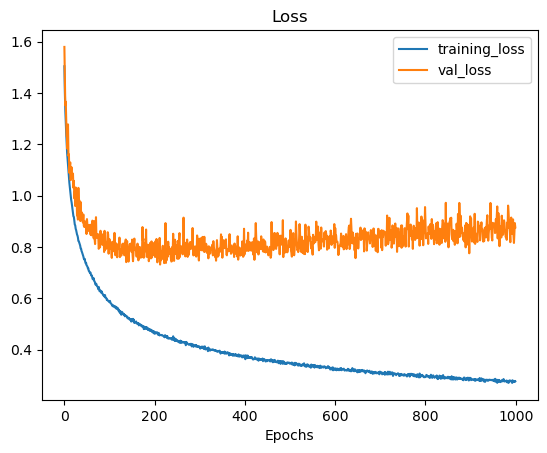

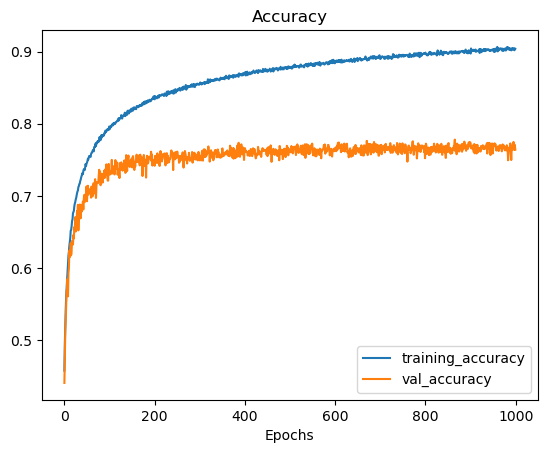

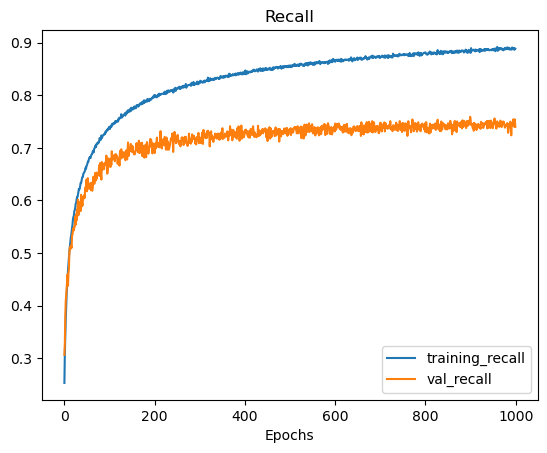

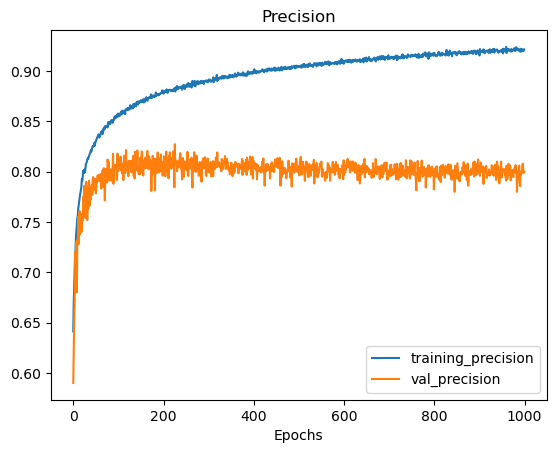

In [71]:
# Check out the loss curves
plot_loss_curves(history)

In [72]:
y_pred = model.predict(test_data)

In [73]:
y_test = np.concatenate([y for x, y in test_data], axis=0)
y_test.argmax(axis=1)


array([5, 8, 2, ..., 8, 0, 2], dtype=int64)

In [74]:
y_pred.argmax(axis=1).shape

(10000,)

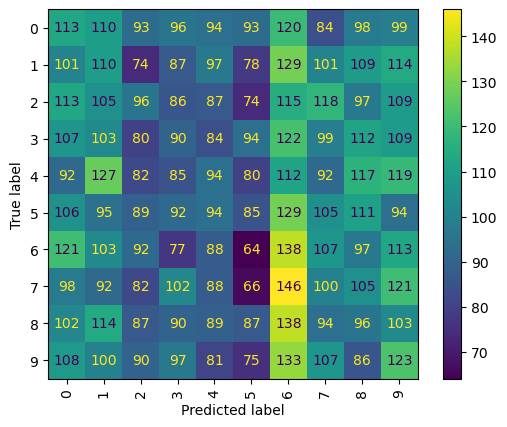

"\nlabels\n{0: 'cat',\n  1: 'dog',\n  2: 'truck',\n  3: 'bird',\n  4: 'airplane',\n  5: 'ship',\n  6: 'frog',\n  7: 'horse',\n  8: 'deer',\n  9: 'automobile'})\n"

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_dict.keys())
disp.plot(xticks_rotation='vertical')
plt.show()

"""
labels
{0: 'cat',
  1: 'dog',
  2: 'truck',
  3: 'bird',
  4: 'airplane',
  5: 'ship',
  6: 'frog',
  7: 'horse',
  8: 'deer',
  9: 'automobile'})
"""

## Save the model for later use (i.e. deploying it to production, making predictions, grad-cam, etc)

After we have trained a model we can easily save it with `model.save()`

In [76]:
model.save('saved_models/model_with_data_augmentation_layer')

INFO:tensorflow:Assets written to: saved_models/model_with_data_augmentation_layer\assets


In [ ]:
# and we can load it easily with the load_model method
loaded_model = tf.keras.models.load_model('saved_models/model_with_data_augmentation_layer/')
#graphs: epochs of 200 should be enough.

## Good Luck (or well done!)

If you just read through everything, good luck with this lab! Otherwise, well done and please send it to your instructor.